In [141]:
%matplotlib inline
from scipy import signal, ndimage
import numpy as np
import matplotlib.pyplot as plt
import time
from get_neuralynx import *
from pathlib import Path
import h5py
import seaborn as sns
import pandas as pd

font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)

In [5]:
animal = 'Li'
task = 'T3g'
date = '062718'
filename = animal+'_'+task+'_'+date+'_Results'
datPath=Path('/Users/alexgonzalez/Google Drive/PostDoc/Data/',task,animal,filename)
savePath=Path(datPath,'plots')
savePath.mkdir(parents=True, exist_ok=True)

In [6]:
# Read Events
f=h5py.File((datPath / 'Events.h5'), 'r') 
ev={}
for key in f.keys():
    ev[key]=f.get(key).value

In [7]:
ev

{'CL': array([2552.2964  , 2592.941384, 2621.009498, 2676.221788, 2720.640676,
        2734.914546, 2749.206602, 2767.645408, 2782.495277, 2796.342834,
        2823.518229, 2853.431842, 2883.453361, 2897.338168, 2974.028731,
        2985.345789, 2998.625971, 3012.61259 , 3049.305388, 3083.520156,
        3111.40177 , 3140.199758, 3161.159031, 3189.308301, 3213.26826 ,
        3231.055284, 3242.989935, 3257.19943 , 3283.776763, 3309.889096,
        3321.142654, 3369.894166, 3383.358723, 3425.745362, 3464.139628,
        3488.741181, 3548.848781, 3586.58086 , 3644.502493, 3658.197019,
        3688.358413, 3701.011189, 3726.430648, 3767.017006, 3781.514938,
        3796.104088, 3849.992254, 3863.099936, 3875.112557, 3902.657483,
        3954.565744, 3967.492957, 4000.233381, 4037.404023, 4054.794016,
        4072.109821, 4109.318994, 4123.958457, 4178.097591, 4204.132268,
        4222.092261, 4235.699568, 4251.857312, 4269.977023, 4288.444453,
        4319.823597, 4333.802029, 4346.62868 

In [108]:
def isnear(X,Y,thr):
    '''Find x,y points within the thr'''
    x_out= np.full_like(X, -1)
    y_out= np.full_like(Y, -1)
    match_cnt=1
    cnt1=0
    for x in X:
        cnt2=0
        for y in Y:
            if abs(x-y)<=thr:
                x_out[cnt1]=match_cnt
                y_out[cnt2]=match_cnt
                match_cnt+=1
            cnt2+=1
        cnt1+=1
    return x_out,y_out

def isbefore(X,Y,thr):
    '''Find x,y points within the thr'''
    x_out= np.full_like(X, -1)
    y_out= np.full_like(Y, -1)
    match_cnt=1
    cnt1=0
    for x in X:
        cnt2=0
        for y in Y:
            if abs(x-y)<=thr and x-y<0:
                x_out[cnt1]=match_cnt
                y_out[cnt2]=match_cnt
                match_cnt+=1
            cnt2+=1
        cnt1+=1
    return x_out,y_out

In [97]:
def ev2DF(ev):
    df = pd.DataFrame(columns=['Events','TimeStamps'])
    for key in ev.keys():
        nE = len(ev[key])
        df2 = pd.DataFrame(np.array([nE*[key],ev[key].tolist()]).T,columns=['Events','TimeStamps'])
        df=df.append(df2,ignore_index=True)
        df=df.sort_values('TimeStamps')
    df=df.reset_index()
    df=df.drop(columns='index')
    return df

In [66]:
x1,x2=isnear(ev['DE6'],ev['RD'],0.01)

In [100]:
def getRewardStamps(wellnum, ev):
    x1,x2=isnear(ev['DE'+str(wellnum)],ev['RD'],0.01)
    return ev['RD'][x2>0]

In [183]:
RW={}
for well in np.arange(1,7,dtype=int):
    RW['RW'+str(well)]=getRewardStamps(well, ev)
    

In [184]:
dfRE = ev2DF(RW)
dfRE['RW2']

,Events,TimeStamps
0,RW1,2464.489842
1,RW2,2468.590059
2,RW1,2495.4922039999997
3,RW2,2500.761827
4,RW3,2508.285324
5,RW1,2533.315533
6,RW2,2535.429063
7,RW1,2552.168838
8,RW2,2573.957954
9,RW1,2592.809228


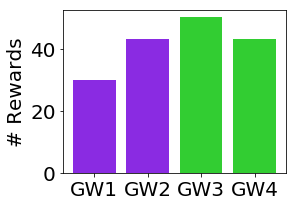

In [166]:
x=[len(RE[3]),len(RE[4]),len(RE[5]),len(RE[6])]
dfr = pd.DataFrame(np.array([['GW1','GW2','GW3','GW4'],x]).T,columns=['GW','nRewards'])

fig, ax = plt.subplots( figsize=(4,3))
a=ax.bar(dfr['GW'],x)
a[0].set_facecolor('blueviolet')
a[1].set_facecolor('blueviolet')
a[2].set_facecolor('limegreen')
a[3].set_facecolor('limegreen')
ax.set_ylabel('# Rewards')
fig.savefig(str(savePath / 'RewardByGoal.pdf'),bbox_inches='tight')


In [154]:
a[1].set_facecolor

In [137]:
np.array([['GW1','GW2','GW3','GW4'],x]).T

array([['GW1', '30'],
       ['GW2', '43'],
       ['GW3', '50'],
       ['GW4', '43']], dtype='<U3')

(2, 4)

In [129]:
x1,x2=isbefore(ev['DE4'],RE[3],thr=3) 
    

In [126]:
np.mean(x2>0)

0.9333333333333333

In [128]:
x1,x2=isbefore(ev['DE3'],RE[4],thr=3) 
np.mean(x2>0)

0.0